In [70]:
include("../src/dependencies.jl");
pyplot()

Plots.PyPlotBackend()

In [37]:
param = ( ϵ  = 1/2,
        	N  = 2^14,
            L  = 10,
            T  = 5,
            dt = 0.001)

(ϵ = 0.5, N = 16384, L = 10, T = 5, dt = 0.001)

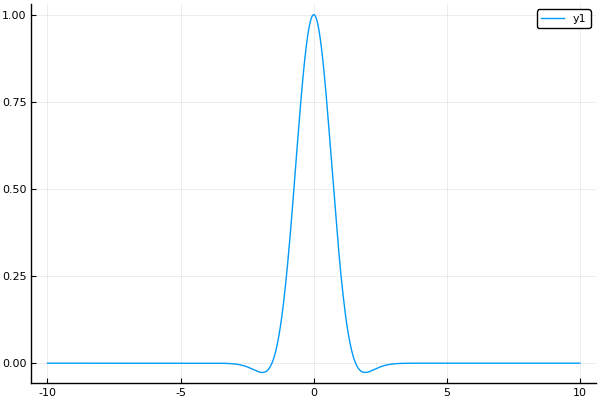

In [88]:
init = HighFreq(param,2,100)
plot(Mesh(param).x,init.h)

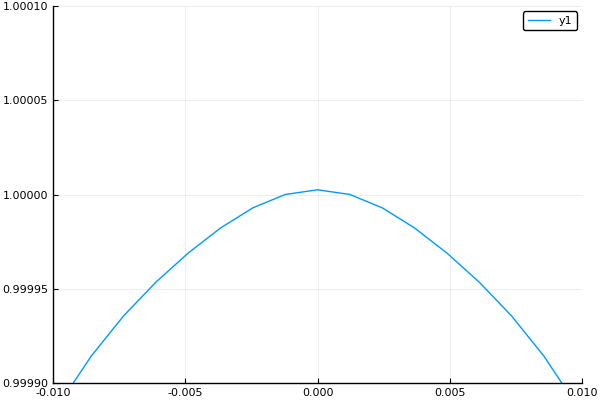

In [92]:
plot(Mesh(param).x,init.h,xlims=(-.01,.01),ylims=(0.9999,1.0001))


In [93]:
model0    = Matsuno_mod_naive(param)
problem0 = Problem(model0, init, param);

model1    = Matsuno_naive(param)
problem1 = Problem(model1, init, param);

model2  = Matsuno(param)
problem2 = Problem(model2, init, param);

problems = [ problem0, problem1, problem2 ];


In [ ]:
p = plot(layout=(2,1))

for problem in problems
	print("\nNow solving the model ",problem.model.label,"\n")
   	@time solve!( problem )
   	fig_problem!( p, problem )

end


Now solving the model modified Matsuno
problem.param = (ϵ = 0.5, N = 16384, L = 10, T = 5, dt = 0.001)


Progress:  17%|███████                                  |  ETA: 0:03:35

In [95]:
p = plot(layout=(2,1))
for problem in problems
    fig_problem!( p, problem ,2.8)
end
p

BoundsError: BoundsError: attempt to access 166-element Array{Array{Complex{Float64},2},1} at index [2801]

In [96]:
maximum(mapfro(model0,problem1.data.U[1000])[2].-mapfro(model0,problem0.data.U[1000])[2])

BoundsError: BoundsError: attempt to access 1-element Array{Array{Complex{Float64},2},1} at index [1000]

In [97]:
maximum(mapfro(model0,problem1.data.U[1000])[2].-mapfro(model0,problem2.data.U[1000])[2])

BoundsError: BoundsError: attempt to access 1-element Array{Array{Complex{Float64},2},1} at index [1000]

In [69]:
round(Int,(2/problem0.times.tfin)*(problem0.times.Nt-1))

2000